# Foundation inference Bootstrap Permutation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from plotnine.data import *
from sklearn.utils import shuffle
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
%matplotlib inline
sns.set() #Making seaborn the default styling 
data_path = '/Users/User/Desktop/Data/Datasets/Learning'
#data_path = '/Users/User/Desktop/Data/DataCamp-master/Intro_to_data'
os.chdir(data_path)
os.listdir()

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


['.DS_Store',
 '2008_all_states.csv',
 '2008_swing_states.csv',
 'aapl.csv',
 'airquality.csv',
 'albeck_gene_expression.mat',
 'Alelager.csv',
 'all_medalists.csv',
 'all_pols.csv',
 'anscombe.csv',
 'austin_airport_departure_data_2015_july.csv',
 'auto-mpg 2.csv',
 'auto-mpg.csv',
 'automobiles.csv',
 'Bangladesh.csv',
 'baseball.csv',
 'Batters2005.csv',
 'battledeath.xlsx',
 'bee_sperm.csv',
 'Beerwings.csv',
 'belmont.csv',
 'BookPrices.csv',
 'boston_housing_train.csv',
 'brics.csv',
 'Bronze.csv',
 'bronze_top5.csv',
 'Bushmeat.csv',
 'Bushmeat2.csv',
 'Cameras.csv',
 'cars.csv',
 'census.csv',
 'census.sqlite',
 'Cereals.csv',
 'Challenger.csv',
 'Chinook.sqlite',
 'clean_file.csv',
 'clean_file.xls',
 'co_cities.csv',
 'corrExerciseA.csv',
 'corrExerciseB.csv',
 'county.csv',
 'Cuckoos.csv',
 'DEXUSEU.csv',
 'digits.csv',
 'disarea.dta',
 'disc_big.csv',
 'disc_new.csv',
 'disc_small.csv',
 'dob_job_application_filings_subset.csv',
 'ebola.csv',
 'effort.dat',
 'email50.csv',


In [2]:
NHANES = pd.read_csv("NHANES.csv", index_col = 0)
NHANES.head()

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
3,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
4,51625,2009_10,male,4,0-9,49.0,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51630,2009_10,female,49,40-49,596.0,White,NaN,Some College,LivePartner,...,No,NaN,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN


## Initial EDA using ggplot2

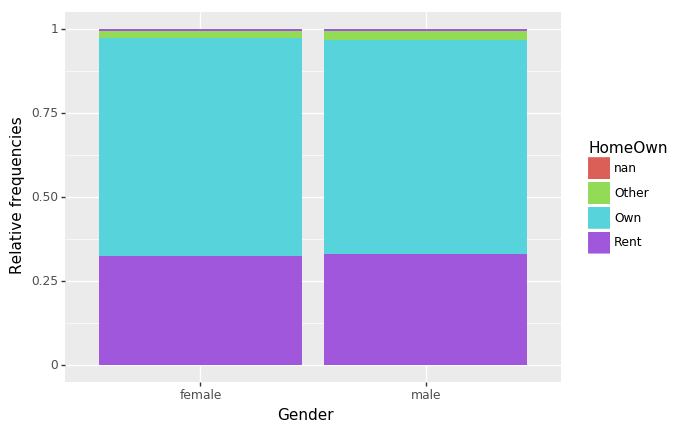

<ggplot: (-9223372029324324871)>

In [3]:
# Create bar plot for Home Ownership by Gender
ggplot(NHANES, aes(x = "Gender", fill = "HomeOwn")) + geom_bar(position = "fill" ) + ylab("Relative frequencies")

/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 2245 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


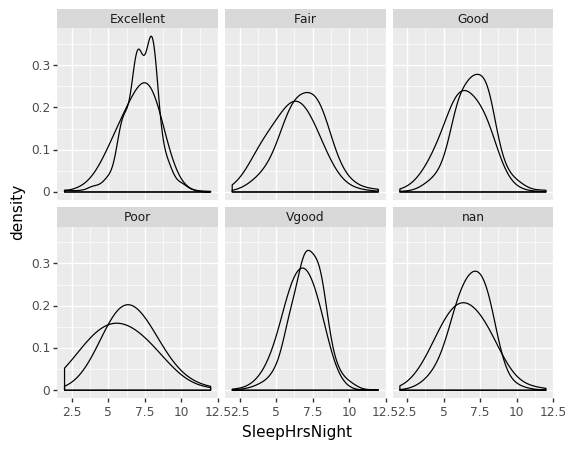

<ggplot: (7531499142)>

In [4]:
# Density for SleepHrsNight colored by SleepTrouble, faceted by HealthGen
ggplot(NHANES, aes(x = "SleepHrsNight", col = "SleepTrouble")) + geom_density(adjust = 2) + facet_wrap("~ HealthGen")

## Randomly allocating samples
Randomly permute the observations and calculate a difference in proportions that could arise from a null distribution.

Using the NHANES dataset, let's investigate the relationship between gender and home ownership. Type ?NHANES in the console to get a description of its variables

Subset the NHANES dataset to consider only individuals whose home ownership status is either "Own" or "Rent". Save the result to homes

In [5]:
homes = NHANES[(NHANES["HomeOwn"]== "Own") | (NHANES["HomeOwn"]=="Rent")][["Gender","HomeOwn"]]
homes['count'] = 1
homes.head()

,Gender,HomeOwn,count
1,male,Own,1
2,male,Own,1
3,male,Own,1
4,male,Own,1
5,female,Rent,1


Perform a single permutation to evaluate whether home ownership status (i.e. HomeOwn) differs between the "female" and "male" groups:
In your call, shuffle home ownership status. Call this new variable HomeOwn_perm, a permuted version of HomeOwn.

In [6]:
homes.groupby(by = ["Gender","HomeOwn"]).count().unstack()

count      
HomeOwn   Own  Rent
Gender             
female   3254  1636
male     3171  1651

In [7]:
homes_s1 = homes.sample()
homes_s1

,Gender,HomeOwn,count
4401,female,Own,1


In [8]:
homes_s1.groupby(by = ["Gender","HomeOwn"]).count().unstack()

,count
HomeOwn,Own
Gender,
female,1


## Testing different shuffle approaches 

In [9]:
raw_data = {'Coast': ['East', 'West', 'West', 'West', 'East'], 
        'Cola': ['Coke', 'Coke', np.NaN, np.NaN, 'Coke']}
df = pd.DataFrame(raw_data, columns = ['Coast', 'Cola'])
df['count']=1
display(df)
df.groupby(["Coast","Cola"]).count()

,Coast,Cola,count
0,East,Coke,1
1,West,Coke,1
2,West,NaN,1
3,West,NaN,1
4,East,Coke,1


,,count
Coast,Cola,
East,Coke,2
West,Coke,1


### Permutations approach 1

In [10]:
p1 = df.reindex(np.random.permutation(df.index))
display(p1)
p1.groupby(["Coast","Cola"]).count()

,Coast,Cola,count
3,West,NaN,1
4,East,Coke,1
0,East,Coke,1
1,West,Coke,1
2,West,NaN,1


,,count
Coast,Cola,
East,Coke,2
West,Coke,1


In [11]:
p2 = df.sample(frac=1, axis=0).reset_index(drop=True)
display(p2)
p2.groupby(["Coast","Cola"]).count()

,Coast,Cola,count
0,West,NaN,1
1,East,Coke,1
2,West,Coke,1
3,West,NaN,1
4,East,Coke,1


,,count
Coast,Cola,
East,Coke,2
West,Coke,1


In [12]:
p3 = df.apply(np.random.permutation, axis=0)    
display(p3)
p3.groupby(["Coast","Cola"]).count()

,Coast,Cola,count
0,West,Coke,1
1,West,NaN,1
2,East,NaN,1
3,East,Coke,1
4,West,Coke,1


,,count
Coast,Cola,
East,Coke,1
West,Coke,2


In [13]:
p4 = shuffle(df)
display(p4)
p4.groupby(["Coast","Cola"]).count()

,Coast,Cola,count
0,East,Coke,1
2,West,NaN,1
3,West,NaN,1
1,West,Coke,1
4,East,Coke,1


,,count
Coast,Cola,
East,Coke,2
West,Coke,1


In [14]:
display(np.random.shuffle(df.values))

None

# Verizon Example
Repair times for two different customers groups:
 - ILEC = Incumbent Local Exchange Carrier i.e. Verizon
 - CLEC = Competing Local Exchange Carrier i.e. others
 Verizon is subject to substantial fines if the repair times for CLEC are substantially worse than for ILEC

### Descriptive statistics 

In [15]:
verizon = pd.read_csv("verizon.csv")
display(verizon.head())
display(verizon.groupby("Group").describe())
ILEC = verizon[verizon["Group"]=="ILEC"].Time
CLEC = verizon[verizon["Group"]=="CLEC"].Time

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


Time                                                         
        count       mean        std  min    25%    50%     75%     max
Group                                                                 
CLEC     23.0  16.509130  19.503576  0.0  5.425  14.33  20.715   96.32
ILEC   1664.0   8.411611  14.690039  0.0  0.730   3.59   7.080  191.60

### Histogram

/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 173'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


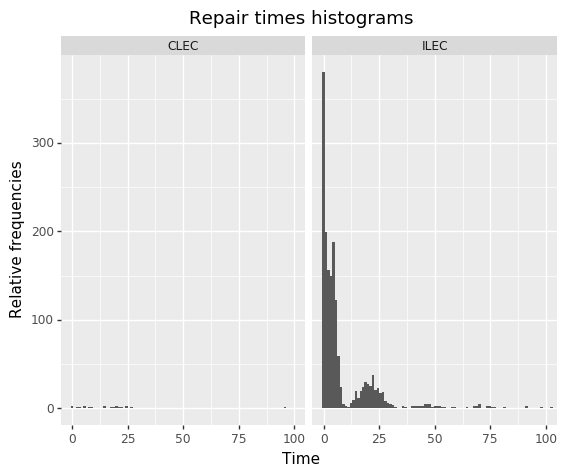

<ggplot: (-9223372029324538126)>

In [16]:
# Create histogram
ggplot(verizon, aes(x = "Time" )) + geom_histogram() + ylab("Relative frequencies") + facet_wrap("~ Group") + coord_cartesian(xlim = (0, 100)) + ggtitle("Repair times histograms")


### Density plot

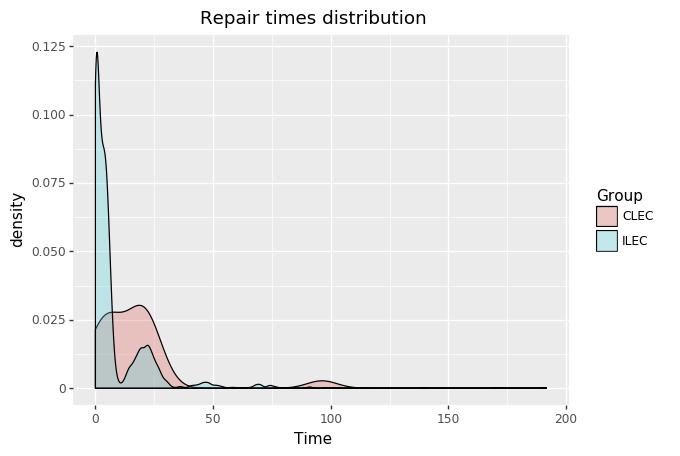

<ggplot: (-9223372036578766462)>

In [17]:
# Create histogram
ggplot(verizon, aes(x = "Time" , fill = "Group")) + geom_density(alpha = .3) \
+  ggtitle("Repair times distribution")


### Box plot

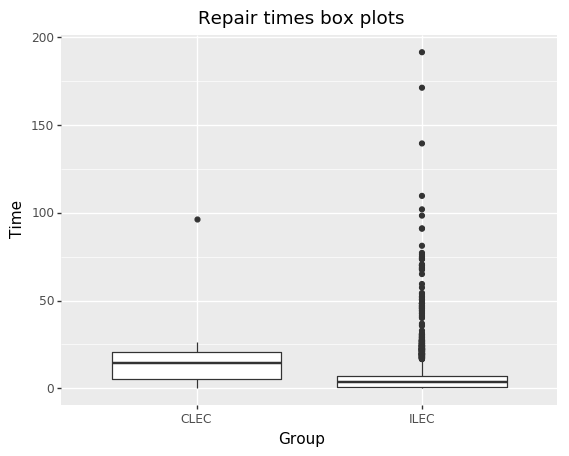

<ggplot: (7531361789)>

In [18]:
ggplot(verizon, aes(x = "Group" , y = "Time")) + geom_boxplot() \
+  ggtitle("Repair times box plots")

### QQ plots to check normality
For all data points

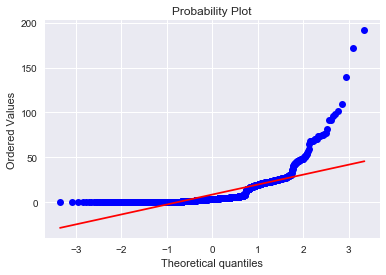

In [19]:
import scipy.stats as stats
stats.probplot(verizon.Time, dist = "norm", plot = plt)
plt.show()

For the two groups separately 

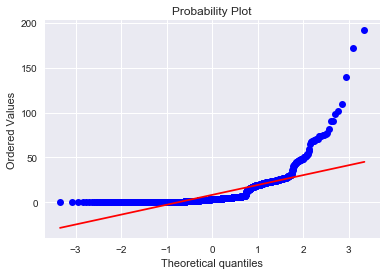

In [20]:
import statsmodels.api as sm
stats.probplot(verizon[verizon["Group"]=="ILEC"].Time, dist = "norm", plot = plt)
plt.show()

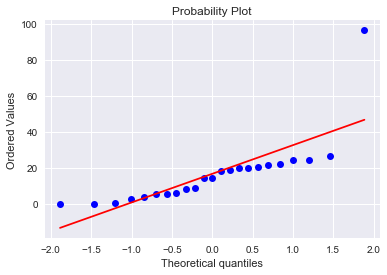

In [21]:
stats.probplot(verizon[verizon["Group"]=="CLEC"].Time, dist = "norm", plot = plt)
plt.show()

Normalizing the data first and using a different library

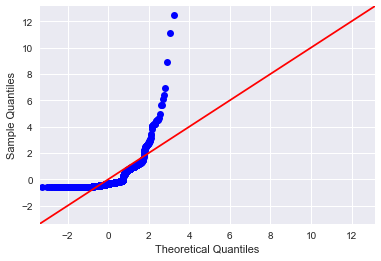

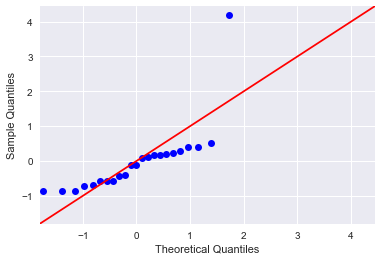

In [22]:
Z_ILEC = stats.mstats.zscore(verizon[verizon["Group"]=="ILEC"].Time)
Z_CLEC = stats.mstats.zscore(verizon[verizon["Group"]=="CLEC"].Time)
sm.qqplot(Z_ILEC, line = '45')
sm.qqplot(Z_CLEC, line = '45')
plt.show()

## Procedure for Bootstrapping
1) **Resample**. Create hundreds of new samples, called bootstrap samples or resamples, by sampling *with replacement* from the original random sample. Each resample is the same size as the original random sample.

 - **Sampling with replacement** means that after we randomly draw an observation from the original sample, we put it back before drawing the next observation. This is like drawing a number from a hat, then putting it back before drawing again. As a result, any number can be drawn once, more than once, or not at all. If we sampled without replacement, we’d get the same set of numbers we started with, though in a different order. Figure 18.2 illustrates the bootstrap resampling process on a small scale. In practice, we would start with the entire original sample, not just six observations, and draw hundreds of resamples, not just three.
 

2) **Calculate the bootstrap distribution**. Calculate the statistic for each resample. The distribution of these resample statistics is called a bootstrap distribution. In Case 18.1, we want to estimate the population mean repair time  , so the statistic is the sample mean x.

3) **Use the bootstrap distribution**. The bootstrap distribution gives information about the shape, center, and spread of the sampling distribution of the statistic.


### Defining the utility function

In [23]:
def bootstrap_statistic(data,func, B = 1000):
    '''Generate B bootstrap samples with replacement (for numpy array only) and calculate the test statistic for each.
    Return a vector containing the test statistics'''
    
    statistics_vector = np.array([])
    
    for i in range(B):
        bootstrap_sample = np.random.choice(data, len(data), replace = True)
        statistics_vector = np.append(statistics_vector, func(bootstrap_sample))
    
    return statistics_vector

#### Bootstrapping the mean of each group

In [24]:
#Generating bootstraps for 1k and 10k resamples
bootstrap_ILEC_1k = bootstrap_statistic(ILEC,np.mean,1000)
bootstrap_CLEC_1k = bootstrap_statistic(CLEC,np.mean,1000)
bootstrap_ILEC_10k = bootstrap_statistic(ILEC,np.mean,10000)
bootstrap_CLEC_10k = bootstrap_statistic(CLEC,np.mean,10000)

#Combining into dataframes
bootstrap_df_1k = pd.DataFrame({"ILEC_1k":bootstrap_ILEC_1k, "CLEC_1k":bootstrap_CLEC_1k}).melt(var_name = "Group", value_name = "Time")
bootstrap_df_10k = pd.DataFrame({"ILEC_10k":bootstrap_ILEC_10k, "CLEC_10k":bootstrap_CLEC_10k}).melt(var_name = "Group", value_name = "Time")
display(bootstrap_df_1k.groupby("Group").describe())
display(bootstrap_df_10k.groupby("Group").describe())

#Stacking the dataframes for the plot
bootstrap_df = pd.concat([bootstrap_df_1k,bootstrap_df_10k], keys = ['1k','10k']).reset_index(level = 0, )
bootstrap_df.rename(index=str, columns={"level_0": "Size"})
bootstrap_df.head()

Time                                                       \
          count       mean       std       min        25%        50%   
Group                                                                  
CLEC_1k  1000.0  16.372349  3.767337  7.941739  13.522391  15.845435   
ILEC_1k  1000.0   8.418264  0.358523  7.467025   8.155682   8.405285   

                               
               75%        max  
Group                          
CLEC_1k  18.834891  29.738261  
ILEC_1k   8.669159   9.720487

Time                                                       \
            count       mean       std       min        25%        50%   
Group                                                                    
CLEC_10k  10000.0  16.489069  3.960898  5.796957  13.558696  16.115870   
ILEC_10k  10000.0   8.411388  0.362536  7.093528   8.169727   8.401397   

                                
                75%        max  
Group                           
CLEC_10k  18.919348  38.351304  
ILEC_10k   8.646566   9.947644

,level_0,Group,Time
0,1k,CLEC_1k,16.451304
1,1k,CLEC_1k,17.352174
2,1k,CLEC_1k,22.176087
3,1k,CLEC_1k,22.347826
4,1k,CLEC_1k,17.586522


#### Computing the bias of the ILEC set
 - Observed mean is 8.41 
 - Bootstrap mean is 8.41 or 8.40


#### Bootstrap standard error is the standard deviation of the bootstrap distribution of the statistic
 - ILEC std = 0.36
 - CLEC std = 3.98

#### Plotting the result
Clearly, increasing the number of samples decreases the standard deviation

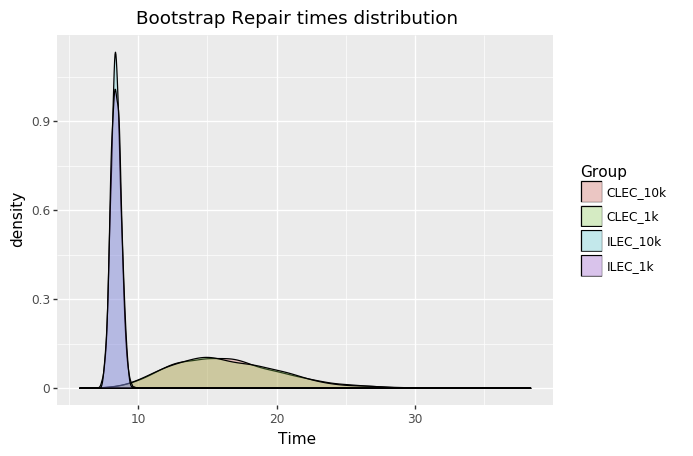

<ggplot: (7541425605)>

In [25]:
# Create histogram
ggplot(bootstrap_df, aes(x = "Time" , fill = "Group")) \
+ geom_density(alpha = .3) +  ggtitle("Bootstrap Repair times distribution")

### Bootstrap the difference between means

Given independent random samples of size n and m from two populations
1. Draw a resample of size n with replacement from the first sample and a separate sample of size m from the second sample
2. Compute a statistic that compares the two groups
3. Repeat the resampling process
4. Construct a bootstrap distribution of the statistic 

In [26]:
def bootstrap_two_populations(data1, data2,func, B = 1000):
    '''Generate n bootstrap samples with replacement (for numpy array only) and calculate the test statistic for each.
    Return a vector containing the test statistics'''
    
    statistics_vector = np.array([])
    
    for i in range(B):
        bootstrap_sample1 = np.random.choice(data1, len(data1), replace = True)
        bootstrap_sample2 = np.random.choice(data2, len(data2), replace = True)
        statistics_vector = np.append(statistics_vector, func(bootstrap_sample1,bootstrap_sample2))
    
    return statistics_vector

def diff_means(data1, data2):
    return np.mean(data1) - np.mean(data2)

In [27]:
bootstrap_diff_1k = pd.DataFrame({'Diff_1k':bootstrap_two_populations(ILEC,CLEC, diff_means,1000)})
bootstrap_diff_10k = pd.DataFrame({'Diff_10k':bootstrap_two_populations(ILEC,CLEC, diff_means,10000)})
bootstrap_diff = pd.concat([bootstrap_diff_1k,bootstrap_diff_10k], keys = ['1k','10k'], axis = 0).melt().dropna()
#bootstrap_diff.rename(index=str, columns={"level_0": "Size"})
bootstrap_diff.groupby('variable').describe()

value                                                      \
            count      mean       std        min        25%       50%   
variable                                                                
Diff_10k  10000.0 -8.072718  4.009383 -28.363976 -10.515494 -7.602614   
Diff_1k    1000.0 -8.034026  3.975117 -24.452324 -10.184380 -7.662162   

                              
               75%       max  
variable                      
Diff_10k -5.125149  2.036966  
Diff_1k  -5.220990  0.900954

###  Difference between the means
 - Mean difference: - 8.09
 - Std deviation of the difference: 4
 - Shape: Not normal, left tail heavy, right tail light
 
Since the distribution of the difference between means is not normal, we cannot safely use t-distribution to construct tests or confidence intervals

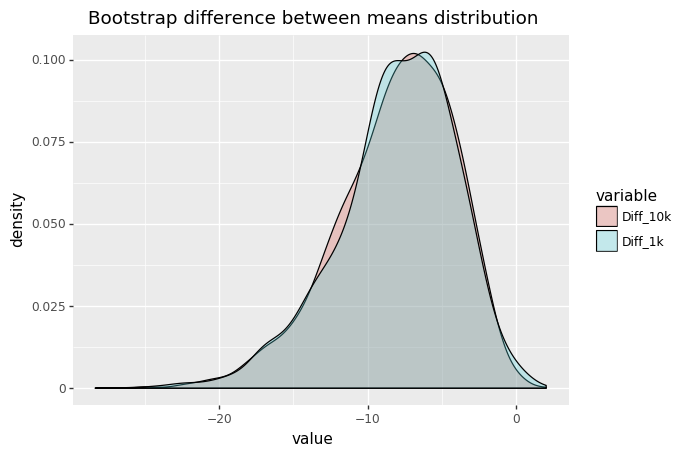

<ggplot: (-9223372029313262297)>

In [28]:
# Create histogram
ggplot(bootstrap_diff, aes(x = "value", fill = 'variable')) + geom_density(alpha = .3) +  ggtitle("Bootstrap difference between means distribution")


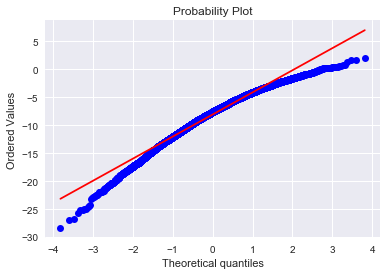

In [29]:
stats.probplot(bootstrap_diff[bootstrap_diff["variable"]=="Diff_10k"].value, dist = "norm", plot = plt)
plt.show()

## Bootstrap linear regression 

In [30]:
from sklearn import datasets
boston = pd.read_csv("boston_housing_train.csv")
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### Finding the highest correlated variable 
Target variable is medv and we will use rm = rooms

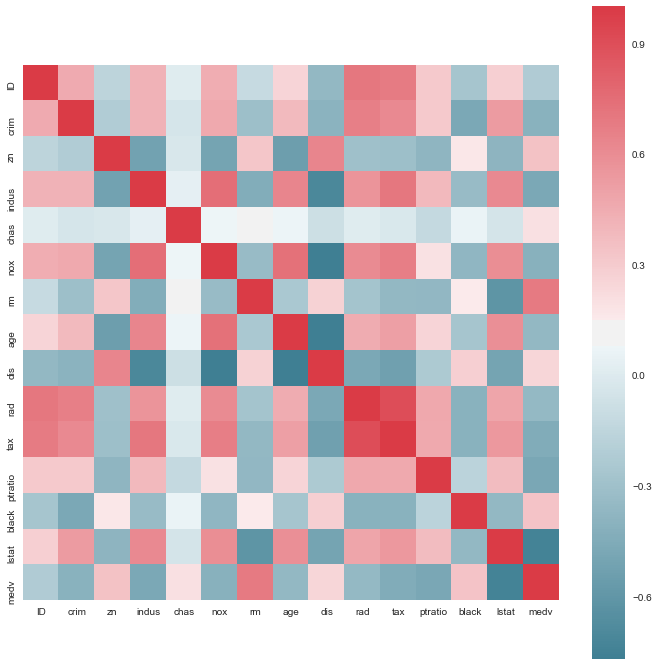

In [31]:
f, ax = plt.subplots(figsize=(12, 12))
corr = boston.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Computing bootstrap confidence intervals directly using Numpy

In [32]:
def linear_fit(x_data,y_data):
    a,b = np.polyfit(x = x_data, y = y_data, deg =1)

    #Make theoretical line to plot
    x_line = np.array([np.min(x_data),np.max(x_data)])
    y_line = a*x_line + b
    
    #Add regression plot
    plt.plot(x_line,y_line, alpha = 0.01, color = 'red', linewidth = .5)

def bootstrap_linear_fit(x_data, y_data, B = 1000):
    #Plot the original data
    plt.plot(x_data, y_data, marker='.', linestyle='none')

    #Setup array of indices to sample from
    inds = np.arange(len(x_data))
    
    for i in range(B):
        bs_inds = np.random.choice(inds, len(inds), replace = True)
        bs_x, bs_y = x_data[bs_inds], y_data[bs_inds] 
        linear_fit(bs_x, bs_y)
    

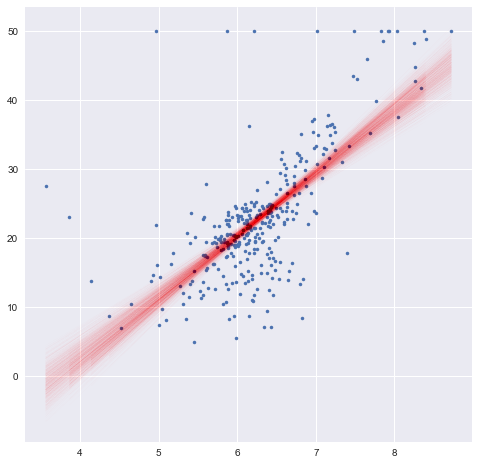

In [33]:
plt.figure(figsize = (8,8))
bootstrap_linear_fit(boston.rm, boston.medv)

### Scatter and bootstrap confidence interval done directly by Seaborn (95%)

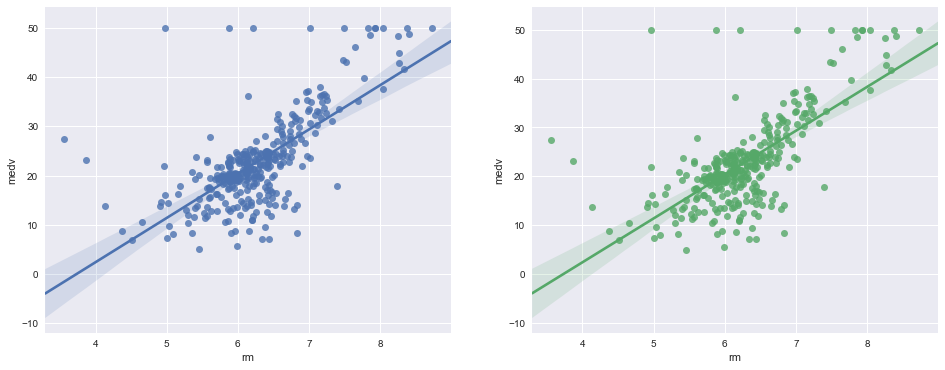

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
ax1 = sns.regplot(x = "rm", y = "medv", data = boston, ax = ax1)
ax2 = sns.regplot(x = "rm", y = "medv", data = boston, ax = ax2)

## Bootstrapping the correlation coefficient
### MLB example

,Name,Salary,Average
0,Matt Williams,9500000,0.269
1,Jim Thome,8000000,0.282
2,Jim Edmonds,7333333,0.327
3,Fred McGriff,7250000,0.259
4,Jermaine Dye,7166667,0.240


The correlation coefficient is =  0.10675750581399636


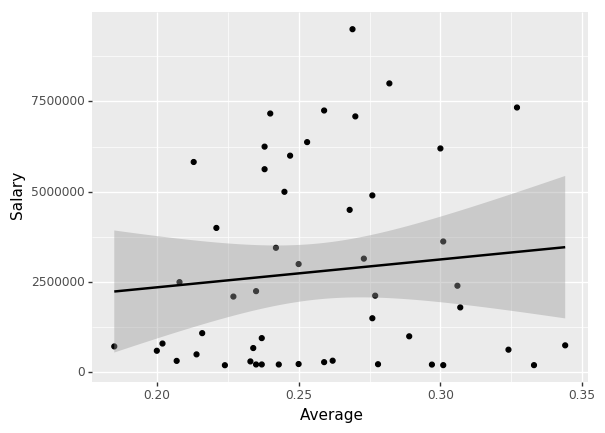

<ggplot: (-9223372029313498431)>

In [35]:
MLB = pd.read_csv("MLB.csv")
display(MLB.head())
print("The correlation coefficient is = ", np.corrcoef(MLB.Average, MLB.Salary)[0,1] )
ggplot(MLB, aes(x = "Average", y="Salary")) + geom_point()+ geom_smooth(method="lm")


In [37]:
def bootstrap_corr_coef(x_data, y_data, B = 2000):
    #Initialize empty array
    coef_array = np.array([])
    
    #Setup array of indices to sample from
    inds = np.arange(len(x_data))
    
    #Loop B times to generate B bootstrap statistics
    for i in range(B):
        bs_inds = np.random.choice(inds, len(inds), replace = True)
        bs_x, bs_y = x_data[bs_inds], y_data[bs_inds] 
        coef_array = np.append(coef_array, np.corrcoef(bs_x, bs_y)[0,1])

    return coef_array


DescribeResult(nobs=2000, minmax=(-0.3424544631506492, 0.5147232720208114), mean=0.10582977565187415, variance=0.016759921772142958, skewness=0.059428056649360364, kurtosis=-0.053204486422349095)

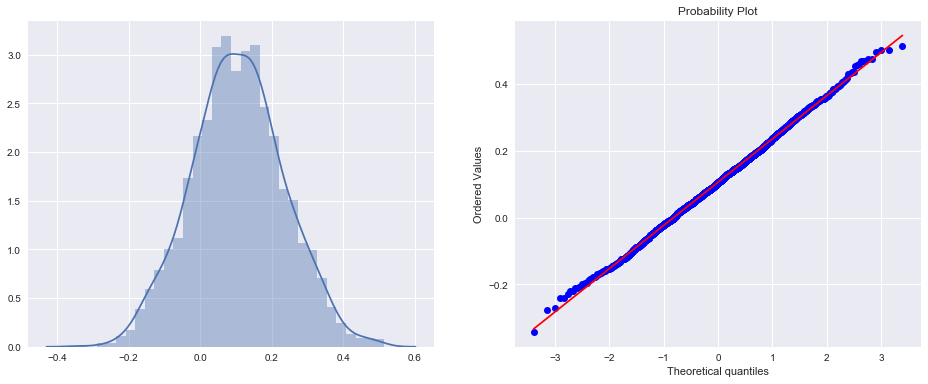

In [46]:
#Running the bootstrap on the correlation coefficient
bs_corr_coef = bootstrap_corr_coef(MLB.Average, MLB.Salary)

# Summary statistics
display(stats.describe(bs_corr_coef))

#Normalizing the bootstrap distribution
norm_bs_corr_coef = stats.mstats.zscore(bs_corr_coef)

#Displaying the distribution and QQ plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
ax1 = sns.distplot(bs_corr_coef, ax = ax1)
ax2 = stats.probplot(bs_corr_coef, dist = "norm", plot = plt)



## Testing for departure from normality
Recall that all of the following hypothesis test work such that the **null hypothesis tests against the the assumption of normality**

In [43]:

#Testing the normality of the resulting bootstrap distribution
print("Sample size = ", norm_bs_corr_coef.size)

#Shapiro-Wilk
print("Shapiro Wilk test: p_value = ", stats.shapiro(norm_bs_corr_coef)[1])

#Kolmogorov-Smirnov
print("Kolmogorov-Smirnov test: p_value = ", stats.kstest(norm_bs_corr_coef, cdf = 'norm')[1])

#Anderson-Darling
print("Anderson-Darling test: p_value = ", stats.anderson(norm_bs_corr_coef)[1][2])

#D’Agostino and Pearson
print("D’Agostino and Pearson test: p_value = ", stats.normaltest(norm_bs_corr_coef)[1])

Sample size =  2000
Shapiro Wilk test: p_value =  0.4019588232040405
Kolmogorov-Smirnov test: p_value =  0.37993284709038055
Anderson-Darling test: p_value =  0.785
D’Agostino and Pearson test: p_value =  0.567525875863175


### An example of NOT normally distributed data 

Sample size =  221
Shapiro Wilk test: p_value =  0.00026834625168703496
Kolmogorov-Smirnov test: p_value =  0.0
Anderson-Darling test: p_value =  0.773
D’Agostino and Pearson test: p_value =  9.715895307086723e-05


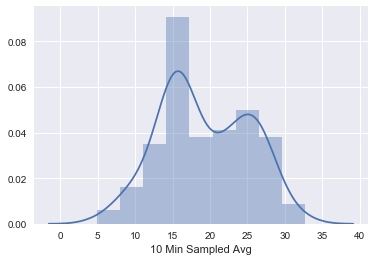

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')
wind = data['10 Min Sampled Avg']
sns.distplot(wind)

#Testing the normality of the resulting bootstrap distribution
print("Sample size = ", wind.size)

#Shapiro-Wilk
print("Shapiro Wilk test: p_value = ", stats.shapiro(wind)[1])

#Kolmogorov-Smirnov
print("Kolmogorov-Smirnov test: p_value = ", stats.kstest(wind, cdf = 'norm')[1])

#Anderson-Darling
print("Anderson-Darling test: p_value = ", stats.anderson(wind)[1][2])

#D’Agostino and Pearson
print("D’Agostino and Pearson test: p_value = ", stats.normaltest(wind)[1])

### Computing the bootstrap t interval

Checking assumptions:
- The bootstrap distribution has normal shape
- Mean = 0.102 
- standard error = 0.129

Standard error =  0.12946011653070205
t values interval = (-2.009575234489209, 2.009575234489209)
bootstrap t interval using standard error = [-0.15433007  0.36598962]
bootstrap percentile interval = (-0.14766880227405357, 0.3574247091000503)


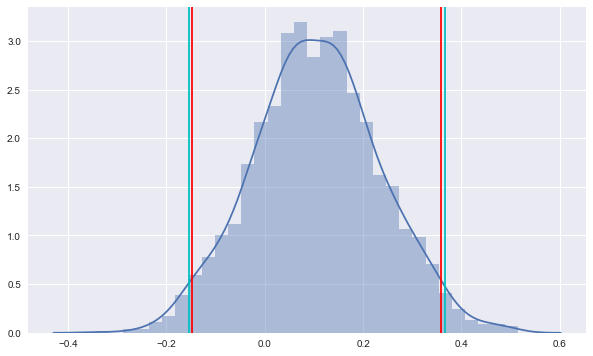

In [83]:
#Bootstrap standard error
print("Standard error = ", np.std(bs_corr_coef, ddof=1))

#Obtaining the t value for 50 - 1 degrees of freedom and 97.5th percentile: 
print("t values interval =",stats.t.interval(0.95, df = 49))

#Calculating the t interval using the bootstrap standard error 
bs_t_interval = np.mean(bs_corr_coef) + (np.array(stats.t.interval(0.95, df = 49)) * np.std(bs_corr_coef, ddof=1))
print("bootstrap t interval using standard error =",bs_t_interval)

#Calculating the t interval using the percentile interval
bs_perc_interval = np.percentile(bs_corr_coef, 2.5), np.percentile(bs_corr_coef, 97.5)
print("bootstrap percentile interval =",bs_perc_interval )

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(bs_corr_coef)

#Vertical lines
plt.axvline(bs_perc_interval[0], color='r')
plt.axvline(bs_perc_interval[1], color='r')
plt.axvline(bs_t_interval[0], color='c')
plt.axvline(bs_t_interval[1], color='c')

# Significance testing using permutation tests
### Verizon data set: 
Penalties are assessed if a significance test concludes at the 1% significance level that CLEC customers are receiving inferior service. A one sided test is used. 

Because the distributions are strongly skewed and the sample size very different we cannot use two sample t tests.

 - ILEC: size = 1664
 - CLEC: size = 23
 - Mean ILEC = 8.411
 - Mean CLEC = 16.509
 - Mean difference = - 8.097519

In [158]:
def permutation_sample(data1,data2):
    '''Generate a permutation sample from two data sets'''

    # Concatenate the data
    data = np.concatenate((data1,data2))
    permutated_data = np.random.permutation(data)
    
    #Select new samples without replacements
    perm_sample1 = permutated_data[:len(data1)]
    perm_sample2 = permutated_data[len(data1):]

    return perm_sample1, perm_sample2

def draw_perm_reps(data_1, data_2, func, n=100):
    '''Generate multiple permutation replicates. 
    Here func is a function that takes two arrays as arguments'''
    
    perm_array = np.array([])
    
    for i in range(n):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_array = np.append(perm_array, func(perm_sample_1,perm_sample_2))

    return perm_array  

In [149]:
perm_mean = draw_perm_reps(ILEC,CLEC,diff_means,100000)

the P value is:  0.01864


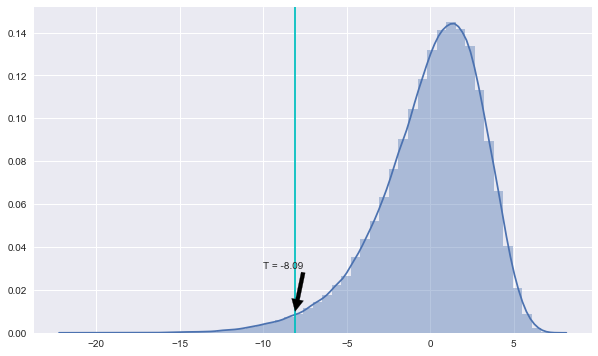

In [165]:
stats.describe(perm_mean)
T = np.mean(ILEC) - np.mean(CLEC)
P = (perm_mean < T).sum() / perm_mean.size
print("the P value is: ",P)

# Plotting the distribution and p value
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(perm_mean)

plt.annotate(
# Label and coordinate
'T = -8.09', xy=(T, .01), xytext=(-10, 0.03),
 
# Custom arrow
arrowprops=dict(facecolor='black')
)

plt.axvline(T, color='c')



### Calculating the p value corresponding to a difference of -8.0975 

In [169]:
np.percentile(perm_mean,1.864)

-8.095822419899667

0.01822

In [141]:
more_extreme_vals.sum()

1822

In [139]:
perm_mean < T

array([False, False, False, ..., False, False, False])

In [171]:
raw_data1 = {'A': ['a1', 'a1', 'a1', 'a1', 'a1'], 
        'B': ['b1', 'b1', 'b1', 'b1', 'b1']}
df1 = pd.DataFrame(raw_data1, columns = ['A', 'B'])
df1['count']=1
display(df1)

raw_data2 = {'A': ['a2', 'a2'], 
        'B': ['b2', 'b2']}
df2 = pd.DataFrame(raw_data2, columns = ['A', 'B'])
df2['count']=1
display(df2)

,A,B,count
0,a1,b1,1
1,a1,b1,1
2,a1,b1,1
3,a1,b1,1
4,a1,b1,1


,A,B,count
0,a2,b2,1
1,a2,b2,1


In [174]:
c = pd.concat([df1,df2], keys = ['one','two'], names = ['Xavier'])
c

A   B  count
Xavier                 
one    0  a1  b1      1
       1  a1  b1      1
       2  a1  b1      1
       3  a1  b1      1
       4  a1  b1      1
two    0  a2  b2      1
       1  a2  b2      1

In [ ]:
c.index.set_names(level = 0, names = 'size')

In [ ]:
d = pd.concat([df1,df2], keys = ['1k','10k']).reset_index(level = 0, )
d.rename(index=str, columns={"level_0": "Size"})